<a href="https://colab.research.google.com/github/jjzsilva9/padl/blob/main/word2vec_practical_initial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PADL Practical: Word2vec embeddings

In [1]:
# Demonstrating word2vec on toy data
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Toy datasets
sentences0 = ["My husky bit me",
             "My husky pulls the sleigh",
             "My dog bit the postman",
              "I ate a pizza with olives",
              "I ate a sandwich with cheese",
              "You ate a hotdog with ketchup",
              "You ate a toast with cheese"
              ]

sentences1 = ["You know Dasher and Dancer and Prancer and Vixen Comet and Cupid and Donner and Blitzen, but do you recall the most famous reindeer of all?",
"Rudolph the Red-Nosed Reindeer Had a very shiny nose And if you ever saw it, You would even say it glows.",
"All of the other reindeer Used to laugh and call him names, They never let poor Rudolph Join in any reindeer games.",
"Then one foggy Christmas Eve Santa came to say: Rudolph, with your nose so bright Will you not guide my sleigh tonight?",
"Then how the reindeer loved him, As they shouted out with glee: Rudolph the Red-Nosed Reindeer, You will go down in history!"]


sentences2 =  ["The itsy bitsy spider went up the water spout.",
              "Down came the rain, and washed the spider out.",
              "Out came the sun, and dried up all the rain.",
              "So, the itsy bitsy spider went up the spout again.",
              "The itsy bitsy spider went up the water spout.",
              "Down came the rain, and washed the spider out.",
              "Out came the sun, and dried up all the rain.",
              "So, the itsy bitsy spider went up the spout again."
           ]

sentences = sentences0 + sentences1 + sentences2

# Tokenize sentences
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

# Number of dimensions for the Word2vec embeddings
v_size = 6

# Window size for the Word2vec training
w_size = 8

# Train Word2Vec model (check the Gensim library for more information)
# https://radimrehurek.com/gensim/auto_examples/index.html
model = Word2Vec(sentences=tokenized_sentences, vector_size=v_size, window=w_size, min_count=1, workers=4)

# Access embeddings: they are stored as KeyedVectors
word_embeddings = model.wv

**Produce the scatterplot of the first 2 components of the word2vec embeddings**

In [21]:
coordX = []
coordY = []
label = []
for key in word_embeddings.index_to_key:
  coordX.append(word_embeddings[key][0])
  coordY.append(word_embeddings[key][1])
  label.append(key)
  print(word_embeddings[key])


[-0.01018509  0.00456494  0.08651998  0.14973716 -0.1527897  -0.11899309]
[ 0.10685224  0.15063806 -0.0822328  -0.06359367  0.12511165 -0.02671136]
[-0.07828293  0.11031719 -0.07867589 -0.03094693  0.05054958  0.01586707]
[-0.13941488 -0.15606359  0.12332752  0.08427955  0.11523996  0.01209527]
[ 0.1046223  -0.05597417 -0.01475179  0.09589332 -0.12375534 -0.0660259 ]
[-0.12715799 -0.01415155  0.16145864 -0.12267385 -0.03646419 -0.03411693]
[ 0.13438863 -0.09830556  0.0017396  -0.07969873 -0.15870832  0.08335845]
[-1.4621219e-01 -7.2938554e-02  6.4898144e-05 -5.3232238e-03
 -1.2706125e-01  1.5993661e-01]
[ 0.08270156  0.15420818 -0.1354192   0.07474869 -0.06818253  0.01343324]
[ 0.14128697 -0.07423015  0.07576572 -0.11326262 -0.05858274  0.15638304]
[-0.02654265  0.00551045 -0.06852385 -0.12857278 -0.02463357  0.04086712]
[-0.01540222  0.09276672 -0.04535312  0.03748622  0.09178692  0.13886113]
[-0.0253575  -0.15279481  0.0745481   0.0084415   0.1257158  -0.01451775]
[-0.04439389 -0.145

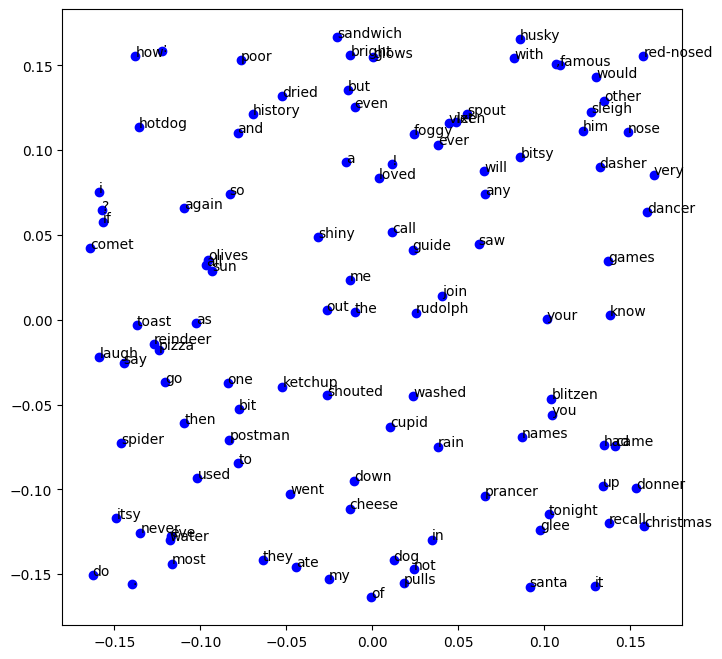

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(coordX, coordY, color = 'blue')

for i, txt in enumerate(label):
    ax.annotate(txt, (coordX[i], coordY[i]))

**Test if the Word2vec features are correlated or orthogonal to each other**

In [23]:
import numpy as np
from scipy.stats import pearsonr

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(word_embeddings.vectors, rowvar=False)

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Analyze the correlations
for i in range(v_size):
    for j in range(i + 1, v_size):
        correlation_coefficient, p_value = pearsonr(word_embeddings.vectors[:, i], word_embeddings.vectors[:, j])
        print(f"Correlation between dimension {i+1} and {j+1}: {correlation_coefficient:.2f}, p-value: {p_value:.3f}")
        if abs(correlation_coefficient) > 0.5:
            print(f"  Dimensions {i+1} and {j+1} are highly correlated.")
        elif abs(correlation_coefficient) < 0.1:
            print(f"  Dimensions {i+1} and {j+1} are nearly orthogonal.")


Correlation Matrix:
[[ 1.          0.11729549 -0.1831733  -0.04788717 -0.04071443  0.0351595 ]
 [ 0.11729549  1.         -0.12372906  0.05377765 -0.05137834 -0.01246053]
 [-0.1831733  -0.12372906  1.          0.02655103 -0.06687142  0.0032221 ]
 [-0.04788717  0.05377765  0.02655103  1.         -0.02873245 -0.08524057]
 [-0.04071443 -0.05137834 -0.06687142 -0.02873245  1.         -0.03500726]
 [ 0.0351595  -0.01246053  0.0032221  -0.08524057 -0.03500726  1.        ]]
Correlation between dimension 1 and 2: 0.12, p-value: 0.227
Correlation between dimension 1 and 3: -0.18, p-value: 0.058
Correlation between dimension 1 and 4: -0.05, p-value: 0.623
  Dimensions 1 and 4 are nearly orthogonal.
Correlation between dimension 1 and 5: -0.04, p-value: 0.676
  Dimensions 1 and 5 are nearly orthogonal.
Correlation between dimension 1 and 6: 0.04, p-value: 0.718
  Dimensions 1 and 6 are nearly orthogonal.
Correlation between dimension 2 and 3: -0.12, p-value: 0.202
Correlation between dimension 2 a

**Apply PCA to the word embeddings, and plot the PC1 vs PC2 scatterplot (with words as labels).**




In [24]:
# Separate the words (as 'labels') from the embeddings (stored in X)
label = []
X = []
for i, key in enumerate(word_embeddings.index_to_key):
  label.append(key)
  X.append(word_embeddings[key])

np.reshape(X,(-1,v_size))

array([[-1.01850936e-02,  4.56494326e-03,  8.65199789e-02,
         1.49737164e-01, -1.52789697e-01, -1.18993089e-01],
       [ 1.06852241e-01,  1.50638059e-01, -8.22327957e-02,
        -6.35936707e-02,  1.25111654e-01, -2.67113578e-02],
       [-7.82829300e-02,  1.10317186e-01, -7.86758885e-02,
        -3.09469271e-02,  5.05495779e-02,  1.58670694e-02],
       [-1.39414877e-01, -1.56063586e-01,  1.23327516e-01,
         8.42795521e-02,  1.15239963e-01,  1.20952651e-02],
       [ 1.04622304e-01, -5.59741743e-02, -1.47517920e-02,
         9.58933234e-02, -1.23755343e-01, -6.60258979e-02],
       [-1.27157986e-01, -1.41515536e-02,  1.61458641e-01,
        -1.22673854e-01, -3.64641882e-02, -3.41169313e-02],
       [ 1.34388626e-01, -9.83055606e-02,  1.73959753e-03,
        -7.96987340e-02, -1.58708319e-01,  8.33584517e-02],
       [-1.46212190e-01, -7.29385540e-02,  6.48981440e-05,
        -5.32322377e-03, -1.27061248e-01,  1.59936607e-01],
       [ 8.27015564e-02,  1.54208183e-01, -1.354

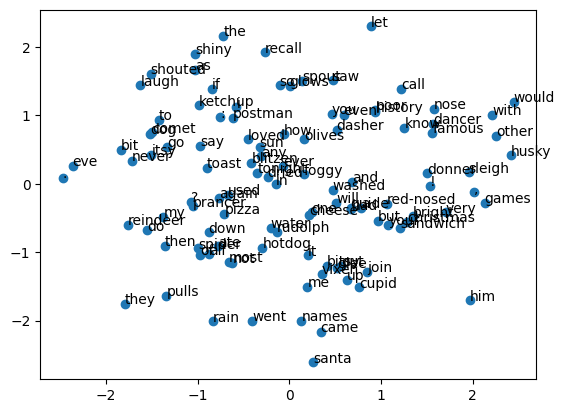

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#Apply PCA to the word embeddings, and plot the PC1 vs PC2 scatterplot (with words as labels).
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scale(X))

#Plot the PC1 vs PC2 scatterplot
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for i, txt in enumerate(label):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]))

**Experiment** with (1) the choice of dataset (by adding and editing sentences), and with (2) different sizes for the word embedding vectors (vector_size) and (3) the window used to generate the embeddings, and study how they affect the PC scatterplot.



*   Can you find a setup that brings closer words that are close in meaning?
*   Can you find a setup that brings closer words with similar syntactic role, e.g. prepositions (on/at/under/near...)?

